In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pickle

In [ ]:
#load data
df= pd.read_csv('heart.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#checking the data
df['age'].unique()
df['sex'].unique()
df['cp'].unique() #chest pain 
df['trestbps'].unique()#resting bp
df['chol'].unique()#cholestrol
df['fbs'].unique() #has range, if >120 --> 1 and the others 0
df['restecg'].unique()#resting ecg
df['thalach'].unique()
df['exang'].unique()
df['oldpeak'].unique()
df['slope'].unique()
df['ca'].unique()#number of major vessels coloured by fluoroscopy
df['thal'].unique()
df['target'].unique()

array([1, 0])

In [ ]:
df = df.drop(['Unnamed: 0'], axis= 1)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.rename(columns= {'sex': 'gender', 'cp':'chest_pain_type', 'trestbps':'rest_bp', 'chol': 'cholestrol', 'fbs':'fasting_blood_sugar', 'restecg':'rest_ecg', 'thalach':'max_heart_rate', 'exang':'exercised_induced_angina', 'oldpeak':'depression_induced_by_exercise', 'ca':'no._of_major_vessels', 'thal':'defect'}, inplace=True)

In [ ]:
df

,age,gender,chest_pain_type,rest_bp,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercised_induced_angina,depression_induced_by_exercise,slope,no._of_major_vessels,defect,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='Count'>

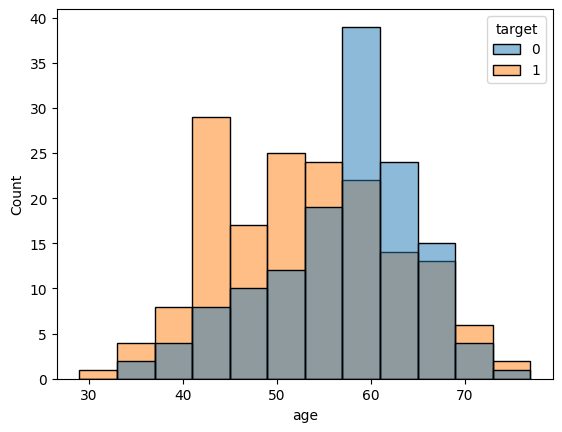

In [ ]:
sns.histplot(x='age', data= df, hue='target')

In [ ]:
#input and output
X= df.drop('target', axis=1)
y=df['target']

In [ ]:
df

,age,gender,chest_pain_type,rest_bp,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercised_induced_angina,depression_induced_by_exercise,slope,no._of_major_vessels,defect,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#splitting the data
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
#model selection
models= [LogisticRegression(class_weight='balanced'), SVC(kernel='linear'), RandomForestClassifier(n_estimators=100, max_depth=5)]

for m in models:
    model=m
    model.fit(Xtrain, ytrain)
    print(f'Model:{m}')
    print('training score: ', model.score(Xtrain, ytrain))
    print('testing score: ', model.score(Xtest, ytest))

c:\Users\mahap\Desktop\Heart Disease Predictor\hdpenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:LogisticRegression(class_weight='balanced')
training score:  0.8679245283018868
testing score:  0.8021978021978022
Model:SVC(kernel='linear')
training score:  0.8820754716981132
testing score:  0.8131868131868132
Model:RandomForestClassifier(max_depth=5)
training score:  0.9669811320754716
testing score:  0.8241758241758241


In [ ]:
#model training
model= LogisticRegression(class_weight='balanced')
model.fit(Xtrain, ytrain)

c:\Users\mahap\Desktop\Heart Disease Predictor\hdpenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [ ]:
#prediction
ypred= model.predict(Xtest)

In [ ]:
print('training score: ', model.score(Xtrain, ytrain))
print('testing score: ', model.score(Xtest, ytest))

training score:  0.8679245283018868
testing score:  0.8021978021978022


In [ ]:
confusion_matrix(ytest, ypred)

array([[32,  9],
       [ 9, 41]])

In [ ]:
print('Accuracy score: ', accuracy_score(ytest, ypred))
print('Precision score: ', precision_score(ytest, ypred))
print('Recall score: ', recall_score(ytest, ypred))

Accuracy score:  0.8021978021978022
Precision score:  0.82
Recall score:  0.82


In [ ]:
#storing the cleaned model
df.to_csv('cleaned_data.csv')

In [ ]:
with open('log_model.pkl', 'wb') as file:
    pickle.dump(model,file)